In [74]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from collections import defaultdict
from matplotlib import cm
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [51]:
df = pd.read_csv('data/0408final.csv')
df.index = df['Unnamed: 0']

In [52]:
for route in df.index:
    if df.loc[route]['UniqueCarrier'] == 'HP':
        if pd.to_datetime(df.loc[route]['2005LastDate']) > pd.to_datetime('2005-12-25'):
            df.set_value(route,'2005ClosureIndicator', 0)
    if pd.to_datetime(df.loc[route]['2008LastDate']) > pd.to_datetime('2008-09-01'):
        df.set_value(route,'2008ClosureIndicator',0)

In [53]:
# CREATE HIST
year_list = range(2004,2009)
route_dict = defaultdict(list)
for route in df.index:
    for year in sorted(year_list)[::-1]:
        if pd.isnull(df.loc[route]['{}LastDate'.format(year)]):
            if 3 > len(route_dict[route]) > 0:
                route_dict[route].append( 
                    df.loc[route]['{}FirstDate'.format(year + 1)])
            continue
        elif len(route_dict[route]) > 0:
            continue
        else:
            route_dict[route].extend([df.loc[route]['{}ClosureIndicator'.format(
                year)], df.loc[route]['{}LastDate'.format(year)]])
    if len(route_dict[route]) < 3:
        route_dict[route].append(df.loc[route]['2004FirstDate'])
    
route_dict.values()[12]

[1.0, '2007-03-19 00:00:00', '2005-01-31 00:00:00']

In [54]:
# CREATE HIST
X_list = []
y_list = []
route_list = []
for route in route_dict.keys(): 
    if route_dict[route][0] == 1:
        day = abs(pd.to_datetime(route_dict[route][1])-pd.to_datetime(route_dict[route][2])).days
        X_list.append(day)
        if day < 300:
            X_list.append(day)
        if day < 5:
            continue

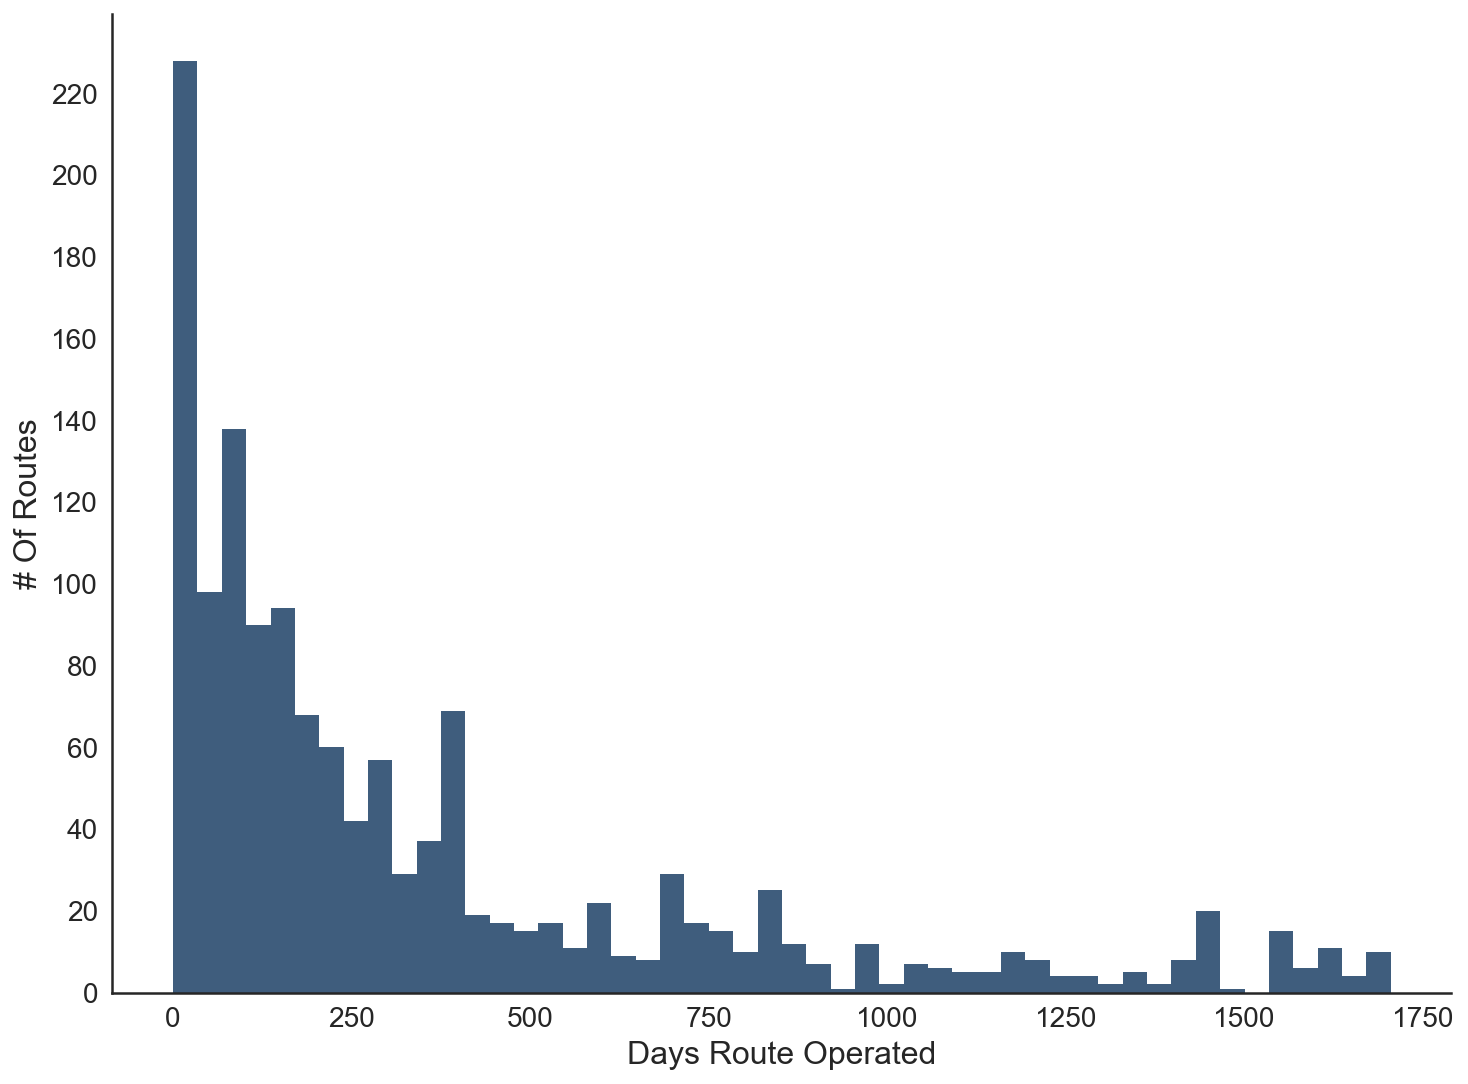

In [55]:
# You typically want your plot to be ~1.33x wider than tall.  
# Common sizes: (10, 7.5) and (12, 9)  
plt.figure(figsize=(12, 9))
sns.set_style('white')
  
# Remove the plot frame lines. They are unnecessary chartjunk.  
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
  
# Ensure that the axis ticks only show up on the bottom and left of the plot.  
# Ticks on the right and top of the plot are generally unnecessary chartjunk.  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()  
  
# Make sure your axis ticks are large enough to be easily read.  
# You don't want your viewers squinting to read your plot.  
plt.xticks(fontsize=14)  
plt.yticks(range(0,400, 20), fontsize=14)  
  
# Along the same vein, make sure your axis labels are large  
# enough to be easily read as well. Make them slightly larger  
# than your axis tick labels so they stand out.  
plt.xlabel("Days Route Operated", fontsize=16)  
plt.ylabel("# Of Routes", fontsize=16)  
  
# Plot the histogram. Note that all I'm passing here is a list of numbers.  
# matplotlib automatically counts and bins the frequencies for us.  
# "#3F5D7D" is the nice dark blue color.  
# Make sure the data is sorted into enough bins so you can see the distribution.  
plt.hist(X_list,  
         color="#3F5D7D", bins=50)

    
plt.savefig("Closed_Route_Length_Distribution.png", bbox_inches="tight");

In [56]:
#CREATE VIOLIN PLOT
year_list = range(2004,2009)
route_dict2 = defaultdict(list)
for route in df.index:
    for year in sorted(year_list)[::-1]:
        if pd.isnull(df.loc[route]['{}fill_pct'.format(year)]):
            continue
        else:
            route_dict2[route].append([df.loc[route]['{}ClosureIndicator'.format(year)],\
                                     df.loc[route]['{}fill_pct'.format(year)],route])
            break
        

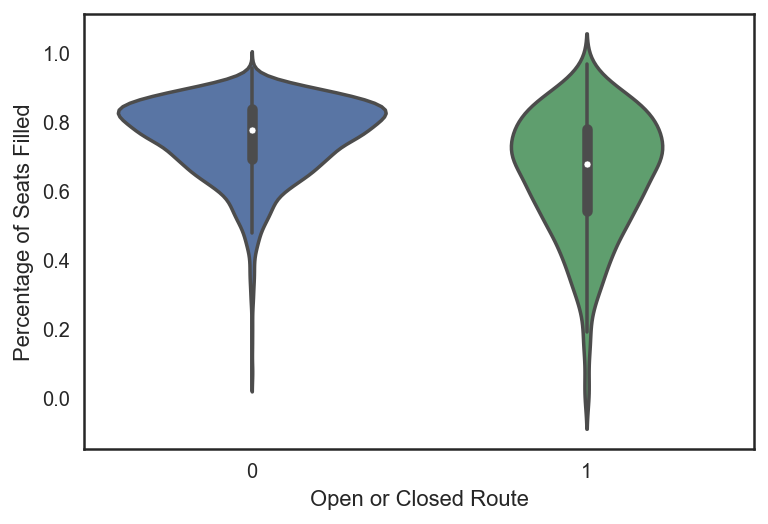

In [57]:
#CREATE VIOLIN PLOT
close_list = []
open_list = []
y_pos = [0,1]
for value in route_dict2.values():
    if value[0][0] == 0:
        open_list.append(value[0][1])
        #open_route.append(value[0][2])
    if value[0][0] == 1:
        close_list.append(value[0][1])
        #closed_route.append(value[0][2])

#plt.violinplot([np.asarray(open_list),np.asarray(close_list)],y_pos)
ax = sns.violinplot(data=[np.asarray(open_list),np.asarray(close_list)])
ax.set(xlabel='Open or Closed Route', ylabel='Percentage of Seats Filled')

plt.show()

In [58]:
year_list = range(2004,2009)
route_dict3 = defaultdict(list)
for route in df.index:
    for year in sorted(year_list)[::-1]:
        if pd.isnull(df.loc[route]['{}fill_pct'.format(year)]):
            continue
        else:
            if df.loc[route]['{}FlightTotal'.format(year)] < 1000:
                continue
            else:
                route_dict3[route].append([df.loc[route]['{}ClosureIndicator'.format(year)],\
                                     df.loc[route]['{}AvgDelay'.format(year)],route])
            break


In [59]:
close_list2 = []
open_list2 = []
open_route = []
closed_route = []
for value in route_dict3.values():
    if value[0][0] == 0:
        open_list2.append(value[0][1])
        open_route.append(value[0][2])
    if value[0][0] == 1:
        close_list2.append(value[0][1])
        closed_route.append(value[0][2])

def argsort(seq):
    # http://stackoverflow.com/questions/3071415/efficient-method-to-calculate-the-rank-vector-of-a-list-in-python
    return sorted(range(len(seq)), key=seq.__getitem__)

top = argsort(open_list2)[::-1][0:10]
for index in top:
    print open_list2[index]
    print open_route[index]

33.2888959123
OO EWR MKE
32.724880964
AA JFK MIA
31.8064182195
AA MCO SJU
29.698685541
B6 EWR PBI
27.7826777218
UA DEN EWR
27.6042736799
UA EWR ORD
26.8684594538
CO EWR ORD
26.3917819365
CO EWR RDU
26.2068354085
OO CEC SFO
25.5817356206
CO CMH EWR


In [60]:
df = df.dropna()

In [61]:
sum_groupby = df.groupby('UniqueCarrier').sum()

In [ ]:
year_list = range(2004,2009)
carrier_counts = []
carrier_names = []
for carrier in sum_gropuby:
    for year in year_list:
        carrier['{}FlightTotal'.format(year)]
        
        

In [62]:
data1 = pd.read_csv('data/xtra_data/2004.csv')
data2 = pd.read_csv('data/xtra_data/2013.csv')


/Users/ChrisV/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,1,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [137]:
carrier04 = data1.groupby('UniqueCarrier').count()
carrier15 = data2.groupby('UNIQUE_CARRIER').count()
import matplotlib as mpl

In [132]:
Other = 0
labels_04 = []
flights_04 = []
labels_15 = []
flights_15 = []
for index in range(len(carrier04)):
    labels_04.append(carrier04.iloc[index].name)
    flights_04.append(carrier04.iloc[index]['CRSDepTime'])
for index in range(len(carrier15)):
    if carrier15.iloc[index].name in ['VX','HA','F9','FL','YV','AS','B6']:
        Other += carrier15.iloc[index]['CRS_DEP_TIME']
        continue
    labels_15.append(carrier15.iloc[index].name)
    flights_15.append(carrier15.iloc[index]['CRS_DEP_TIME'])
flights_15.append(Other)
labels_15.append('Other')
flights_15.remove(11)
labels_15.remove('UNIQUE_CARRIER')

In [133]:
print labels_15
print flights_15
labels_15 = ['Endeavor Air', 'American','Delta', 'ExpressJet', 'Envoy Air','SkyWest', 'United','US Airways','SouthWest','Other'] 

['9E', 'AA', 'DL', 'EV', 'MQ', 'OO', 'UA', 'US', 'WN', 'Other']
[296701, 537891, 754670, 748696, 439865, 626359, 505798, 412373, 1130704, 916425]


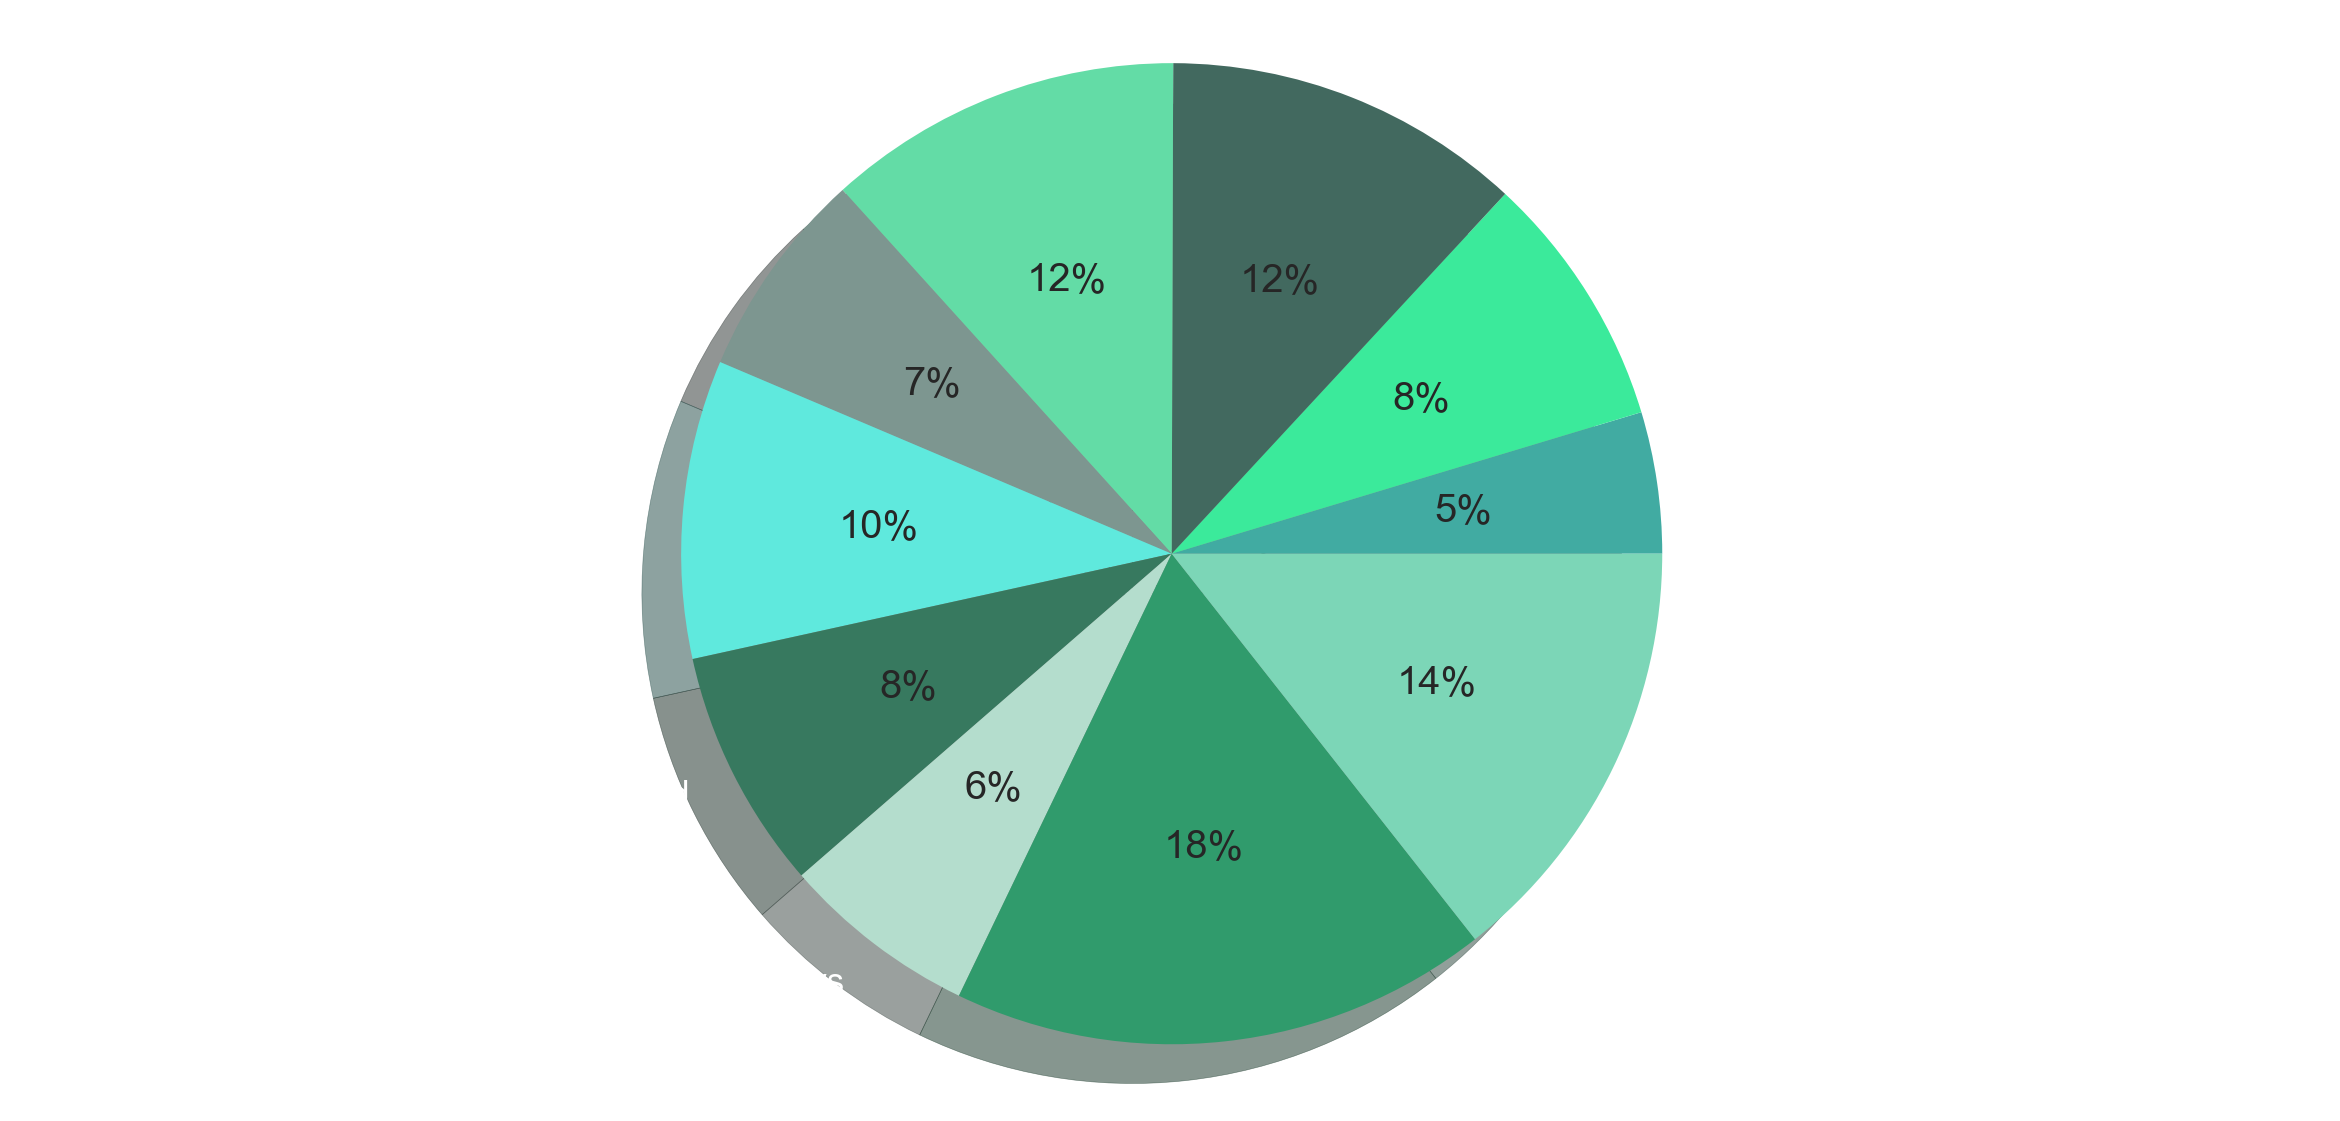

In [236]:
sns.set()
mpl.rcParams['xtick.minor.size'] = 40.0
f, axarr = plt.subplots(1,figsize=(20,10))
colors = ["#41aba2",
"#3bea9b",
"#42695f",
"#63dca6",
"#7d9690",
"#5fe9dd",
"#37795f",
"#b4ddcd",
"#309b6c",
"#7cd6b7",
"#6ea28c"]
patches, texts, autotexts = plt.pie(flights_15, labels=labels_15,
                                    autopct='%.0f%%',
                                    shadow=True, colors = colors, radius=0.5)
axarr.axis('equal')

for t in texts:
    t.set_size('x-large')
    t.set_color('w')
for t in autotexts:
    t.set_size(fontsize=20)
f.savefig('piechart4.png', transparent=True)
plt.show()

In [79]:
import model_data_prep as mdp

In [80]:
print labels_15

['AA', 'AS', 'B6', 'DL', 'EV', 'FL', 'MQ', 'OO', 'UA', 'US', 'VX', 'WN']


In [143]:
test = mdp.year_slice(df,range(2004,2009))

In [144]:
test = test.dropna()

In [83]:
for index, time in enumerate(test['BlockTime']):
    if time < -150:
        test.drop(test.iloc[index].name, inplace=True)
name_list = []
for index in range(len(test)):
    if test.iloc[index]['FlightTotal'] < 52:
        name_list.append(test.iloc[index].name)
test.drop(name_list, inplace=True)
X = test['fill_pct']
y = test['ClosureIndicator']

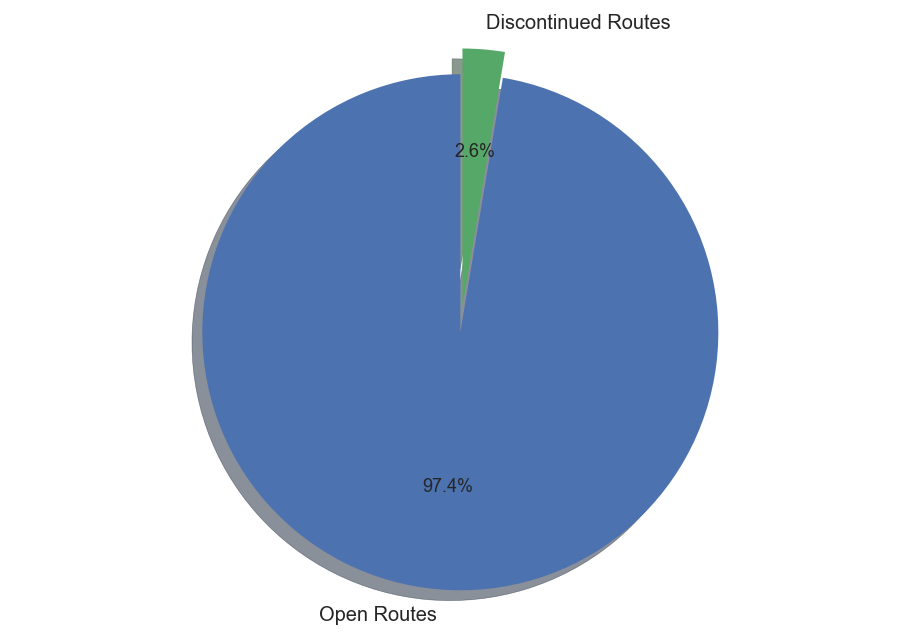

In [142]:
fig1, ax1 = plt.subplots()
Closed = sum(test['ClosureIndicator']==1)/float(len(test))
Open = sum(test['ClosureIndicator']==0)/float(len(test))
data = [Open,Closed]
labels = ['Open Routes','Discontinued Routes']
ax1.pie(data,labels=labels, explode = [0.05,0.05],autopct='%1.1f%%',shadow=True, startangle=90, )
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig1.savefig('piechart2.png', transparent=True)
plt.show()

(array([ 353.,  351.,  235.,  118.,   98.,   80.,   53.,   48.,   28.,
          24.,   22.,   15.,   15.,    7.,    7.,    8.,    4.,    1.,
           5.,    0.,    3.,    1.,    2.,    0.,    1.]),
 array([    2358.  ,    79436.04,   156514.08,   233592.12,   310670.16,
          387748.2 ,   464826.24,   541904.28,   618982.32,   696060.36,
          773138.4 ,   850216.44,   927294.48,  1004372.52,  1081450.56,
         1158528.6 ,  1235606.64,  1312684.68,  1389762.72,  1466840.76,
         1543918.8 ,  1620996.84,  1698074.88,  1775152.92,  1852230.96,
         1929309.  ]),
 <a list of 25 Patch objects>)

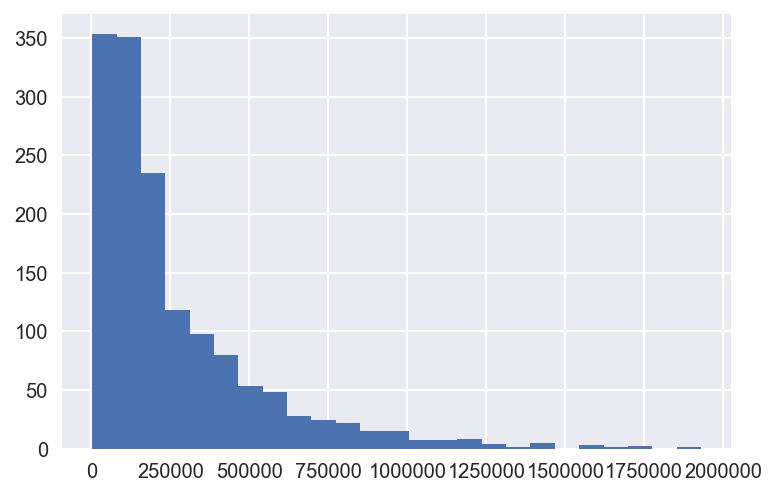

In [85]:
plt.hist(test['Passengers'], bins=25)

In [177]:
import randomforest as rf
import feature_engineer as fe

Index([u'route', u'Seats', u'Passengers', u'fill_pct', u'FlightTotal',
       u'CRSElapsedTime', u'ActualElapsedTime', u'ClosureIndicator',
       u'AvgDelay', u'CarrierDelay', u'WeatherDelay', u'NASDelay',
       u'CancelledAvg', u'LateAircraftAvg', u'Distance', u'FirstDate',
       u'LastDate', u'BlockTime', u'Dest', u'Seasonal'],
      dtype='object')

In [155]:
Carriers = []
Origin = []
for line in test['route']:
    line = line.split(' ')
    Carriers.append(line[0])
    Origin.append(line[1])
test['UNIQUE_CARRIER'] = Carriers
test['Origin'] = Origin

In [156]:
test = fe.hub_or_point_indicator(test)
test = fe.indicate_hubs(test)
test = fe.regional_indicator(test)

In [89]:
test = fe.get_carrier_dummies(test)

In [250]:
X = test.drop(['UNIQUE_CARRIER','Origin','route','FirstDate','LastDate','Dest','Seasonal','BlockTime','ClosureIndicator'],axis=1)

In [251]:
y = list(test['ClosureIndicator'])

In [252]:
model = rf.random_forest_cross_val(X,y)

/Users/ChrisV/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/ChrisV/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


accuracy_scores : 0.955127802951
precision_scores : 0.304285714286
recall_scores : 0.183333333333


Index([u'Seats', u'Passengers', u'fill_pct', u'FlightTotal', u'CRSElapsedTime',
       u'ActualElapsedTime', u'AvgDelay', u'CarrierDelay', u'WeatherDelay',
       u'NASDelay', u'CancelledAvg', u'LateAircraftAvg', u'Distance', u'AA',
       u'AS', u'B6', u'CO', u'DL', u'EV', u'F9', u'HA', u'HP', u'OO', u'UA',
       u'US', u'WN'],
      dtype='object')

Feature ranking:


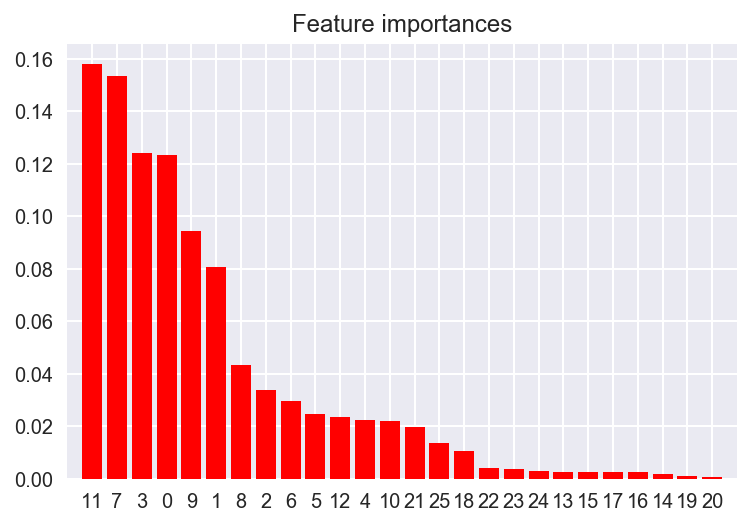

In [33]:
importances = model.feature_importances_
std = np.std([model.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

#for f in range(X.shape[1]):
    #print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()


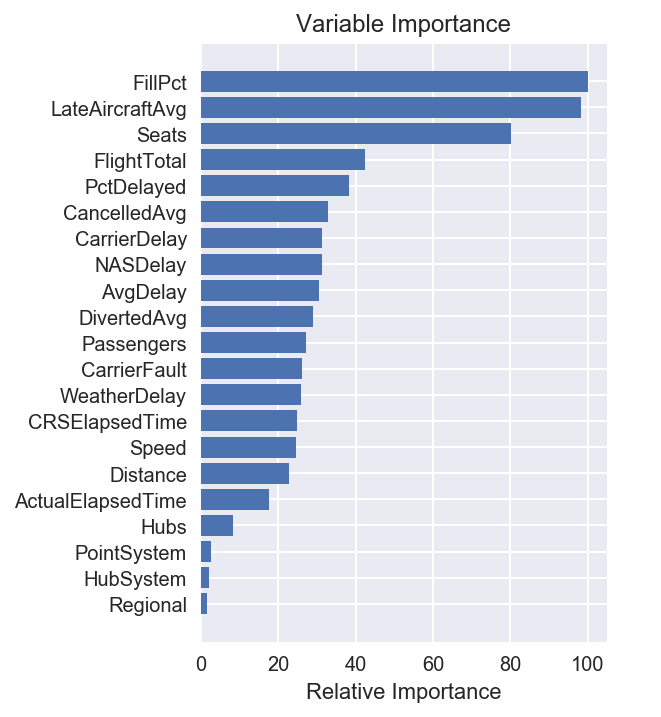

In [253]:
feature_importance = model.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [242]:

#print X.columns[sorted_idx] 

Index([u'PointSystem', u'Regional', u'HubSystem', u'Hubs', u'CarrierFault',
       u'ActualElapsedTime', u'CRSElapsedTime', u'Distance', u'PctDelayed',
       u'AvgDelay', u'Speed', u'Passengers', u'DivertedAvg', u'CancelledAvg',
       u'NASDelay', u'CarrierDelay', u'WeatherDelay', u'FlightTotal', u'Seats',
       u'FillPct', u'LateAircraftAvg'],
      dtype='object')


In [42]:
labels = X.columns

In [43]:
labels[0], labels[1]

Index([u'Seats', u'Passengers', u'fill_pct', u'FlightTotal', u'CRSElapsedTime',
       u'ActualElapsedTime', u'AvgDelay', u'CarrierDelay', u'WeatherDelay',
       u'NASDelay', u'CancelledAvg', u'LateAircraftAvg', u'Distance', u'AA',
       u'AS', u'B6', u'CO', u'DL', u'EV', u'F9', u'HA', u'HP', u'OO', u'UA',
       u'US', u'WN'],
      dtype='object')

In [237]:
test['FillPct'] = test['fill_pct']
test['HubSystem'] = test['hub_system']
test['PointSystem'] = test['point_system']
test['Regional'] = test['regional']
test.drop(['fill_pct','hub_system','point_system','regional'],axis=1,inplace=True)

In [244]:
test['FillPct'], test['LateAircraftAvg'] = test['LateAircraftAvg'], test['FillPct']

In [249]:
test['Seats'], test['LateAircraftAvg'] = test['LateAircraftAvg'], test['Seats']